In [185]:
# importing all the required libraries for the case study
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as ps
warnings.filterwarnings("ignore")

# Step 1 : Data sourcing 
## In this section we will load the data from csv file to the pandas dataframe

In [2]:
df = pd.read_csv('loan.csv') # reading the csv file into pandas dataframe

In [25]:
df.info() # displaying high level info of dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


### High level summary of data
* There are total 111 columns in the data
* There are total 39717 records present in the data

# Step 2 : Data cleaning
## In this section we will remove/take care of following things

### Remove duplicate rows
### Remove useless columns
### Finding missing values
### Imputing missing values with correct values
### Outlier detection

In [4]:
#First let's try to find out of if there is any duplicate rows for the same member
df['member_id'].value_counts().sum()
# sum of unique member_id is matching with the total number of rows so there is no duplicate data for the same member

39717

Finding the columns having only null values or single values and dropping such columns

In [8]:
drop_cols = df.isna().sum().sort_values(ascending=False)
# these columns will have only null values
drop_cols = list((drop_cols[drop_cols == 39717]).index)

In [13]:
len(drop_cols)

54

Dropping these 54 columns and saving data into a new dataset

In [152]:
df_set1 = df.drop(labels= drop_cols,axis = 1)

In [153]:
df_set1.shape

(39717, 57)

### 1. Dropping following customer behaviour columns 
* next_pymnt_d
* mths_since_last_record
* mths_since_last_delinq
* Desc,Url,pymnt_plan
* zip_code
* initial_list_status
* collections_12_mths_ex_med
* policy_code
* application_type
* acc_now_delinq
* chargeoff_within_12_mths
* delinq_amnt
* tax_liens
* title
* delinq_2yrs
* pub_rec_bankruptcies
* open_acc
* inq_last_6mths
* pub_rec
* revol_util
* total_acc

### 2. Dropping following columns cause they have unique value for each row which will not be helpful for our analysis
* id and member_id

### 3. Dropping funded_amnt column as we would get information required from funded_amnt_inv column

### 4. Dropping following columns as they don't give much value for the analysis
* total_rec_late_fee
* recoveries
* collection_recovery_fee
* earliest_cr_line
* emp_title

### 5. There are some columns which are post approvals since we are analyzing the factors which are important in loan approval hence we can remove the post approvals columns
* revol_bal
* out_prncp
* out_prncp_inv
* total_pymnt
* total_pymnt_inv
* total_rec_prncp
* total_rec_int
* last_pymnt_d
* last_pymnt_amnt
* last_credit_pull_d




In [154]:
dropcols1 = ['next_pymnt_d','mths_since_last_record','mths_since_last_delinq','desc','url','pymnt_plan','zip_code','initial_list_status','collections_12_mths_ex_med','policy_code','application_type','acc_now_delinq','chargeoff_within_12_mths','delinq_amnt','tax_liens','title','delinq_2yrs','pub_rec_bankruptcies','open_acc','inq_last_6mths','pub_rec','revol_util','total_acc']
dropcols2 = ['id','member_id']
dropcols3 = ['funded_amnt']
dropcols4 = ['total_rec_late_fee','recoveries','collection_recovery_fee','earliest_cr_line','emp_title']
dropcols5 = ['revol_bal','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d']

# creating a new datafram df_set1 after which will have the data after updates
df_set1 = df.drop(columns=dropcols1, axis = 1)
df_set1.drop(columns = dropcols2,axis = 1,inplace=True)
df_set1.drop(columns = dropcols3,axis = 1,inplace=True)
df_set1.drop(columns = dropcols4,axis = 1,inplace=True)
df_set1.drop(columns = dropcols5,axis = 1,inplace=True)

In [155]:
df_set1.info() # displaying info after removing columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 70 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   loan_amnt                       39717 non-null  int64  
 1   funded_amnt_inv                 39717 non-null  float64
 2   term                            39717 non-null  object 
 3   int_rate                        39717 non-null  object 
 4   installment                     39717 non-null  float64
 5   grade                           39717 non-null  object 
 6   sub_grade                       39717 non-null  object 
 7   emp_length                      38642 non-null  object 
 8   home_ownership                  39717 non-null  object 
 9   annual_inc                      39717 non-null  float64
 10  verification_status             39717 non-null  object 
 11  issue_d                         39717 non-null  object 
 12  loan_status                     

In [156]:
# Now we can see there are alot of column containing null values only
drop_cols = df_set1.isna().sum().sort_values(ascending=False)
drop_cols = list((drop_cols[drop_cols == 39717]).index)
df_set1.drop(labels= drop_cols,axis = 1,inplace = True)
#displaying info after dropping these columns
df_set1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            39717 non-null  int64  
 1   funded_amnt_inv      39717 non-null  float64
 2   term                 39717 non-null  object 
 3   int_rate             39717 non-null  object 
 4   installment          39717 non-null  float64
 5   grade                39717 non-null  object 
 6   sub_grade            39717 non-null  object 
 7   emp_length           38642 non-null  object 
 8   home_ownership       39717 non-null  object 
 9   annual_inc           39717 non-null  float64
 10  verification_status  39717 non-null  object 
 11  issue_d              39717 non-null  object 
 12  loan_status          39717 non-null  object 
 13  purpose              39717 non-null  object 
 14  addr_state           39717 non-null  object 
 15  dti                  39717 non-null 

### Missing values treatment and data type correction

In [157]:
# Loan status contains three values Fully Paid , Charged Off and Current. We can delete all the rows which has loan
# status as Current as we don't need these for our analysis
df_set1.loan_status.unique()

array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

In [158]:
df_set1 = df_set1[df_set1.loan_status != 'Current']

In [159]:
# Replacing loan_status values, Fully paid with 0 and Charged off with 1
df_set1.loan_status = df_set1.loan_status.apply(lambda x : 0 if x == 'Fully Paid' else 1)

In [160]:
df_set1.loan_status.value_counts()

0    32950
1     5627
Name: loan_status, dtype: int64

In [161]:
# creating a function which will return int value from the passed string
def fetchNumber(str_val):
    num = int(''.join([letter for letter in str_val if letter.isdigit()])) if isinstance(str_val,str) else str_val
    return num

In [162]:
#emp_length - extracting no of years and saving in column
df_set1['emp_length'] = df_set1['emp_length'].apply(lambda x :  fetchNumber(x))

In [163]:
# Imputing values on emp_length column
df_set1.emp_length.isna().sum()

1033

In [164]:
# There are 1033 rows where emp_length is null, we are going to fill these values with the mean of emp_length
df_set1.emp_length.fillna(int(df_set1.emp_length.mean()),inplace=True)

In [165]:
# Now no column in the dataframe exists with null value
df_set1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            38577 non-null  int64  
 1   funded_amnt_inv      38577 non-null  float64
 2   term                 38577 non-null  object 
 3   int_rate             38577 non-null  object 
 4   installment          38577 non-null  float64
 5   grade                38577 non-null  object 
 6   sub_grade            38577 non-null  object 
 7   emp_length           38577 non-null  float64
 8   home_ownership       38577 non-null  object 
 9   annual_inc           38577 non-null  float64
 10  verification_status  38577 non-null  object 
 11  issue_d              38577 non-null  object 
 12  loan_status          38577 non-null  int64  
 13  purpose              38577 non-null  object 
 14  addr_state           38577 non-null  object 
 15  dti                  38577 non-null 

In [166]:
#Fixing the term column by removings months string and making column an integer
df_set1.term = df_set1.term.apply(lambda x : fetchNumber(x))

In [167]:
# Removing % sign from interest rate column
df_set1.int_rate = df_set1.int_rate.apply(lambda x : float(x[:-1]))

In [168]:
# converting annual income to int value 
df_set1.annual_inc = df_set1.annual_inc.astype(int)

In [169]:
df_set1.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti
0,5000,4975.0,36,10.65,162.87,B,B2,10.0,RENT,24000,Verified,Dec-11,0,credit_card,AZ,27.65
1,2500,2500.0,60,15.27,59.83,C,C4,1.0,RENT,30000,Source Verified,Dec-11,1,car,GA,1.00
2,2400,2400.0,36,15.96,84.33,C,C5,10.0,RENT,12252,Not Verified,Dec-11,0,small_business,IL,8.72
3,10000,10000.0,36,13.49,339.31,C,C1,10.0,RENT,49200,Source Verified,Dec-11,0,other,CA,20.00
5,5000,5000.0,36,7.90,156.46,A,A4,3.0,RENT,36000,Source Verified,Dec-11,0,wedding,AZ,11.20


In [170]:
# Rounding off the decimal values for the following columns to integer values for better analysis
round_off_cols = ['funded_amnt_inv','installment','int_rate','dti']
df_set1[round_off_cols] = np.round(df_set1[round_off_cols]).astype(int)

In [171]:
df_set1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            38577 non-null  int64  
 1   funded_amnt_inv      38577 non-null  int64  
 2   term                 38577 non-null  int64  
 3   int_rate             38577 non-null  int64  
 4   installment          38577 non-null  int64  
 5   grade                38577 non-null  object 
 6   sub_grade            38577 non-null  object 
 7   emp_length           38577 non-null  float64
 8   home_ownership       38577 non-null  object 
 9   annual_inc           38577 non-null  int64  
 10  verification_status  38577 non-null  object 
 11  issue_d              38577 non-null  object 
 12  loan_status          38577 non-null  int64  
 13  purpose              38577 non-null  object 
 14  addr_state           38577 non-null  object 
 15  dti                  38577 non-null 

# Step 3 - Univariate analysis and outlier detection

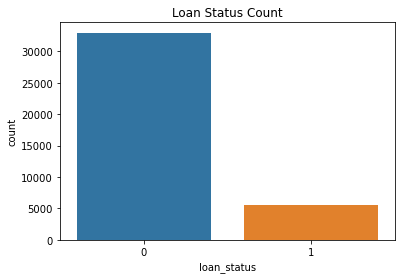

In [172]:
# plotting count plot on the target variable - loan_status
sns.countplot(df_set1.loan_status)
plt.title('Loan Status Count')
plt.show()

In [173]:
# using describe on to see statistical values of numeric variables
df_set1.describe()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,annual_inc,loan_status,dti
count,38577.000000,38577.000000,38577.000000,38577.00000,38577.000000,38577.000000,3.857700e+04,38577.000000,38577.000000
mean,11047.025430,10222.480571,41.898437,11.92327,322.470125,5.059414,6.877797e+04,0.145864,13.273220
std,7348.441646,7022.721532,10.333136,3.68394,208.635488,3.355909,6.421868e+04,0.352975,6.684078
min,500.000000,0.000000,36.000000,5.00000,16.000000,1.000000,4.000000e+03,0.000000,0.000000
25%,5300.000000,5000.000000,36.000000,9.00000,166.000000,2.000000,4.000000e+04,0.000000,8.000000
50%,9600.000000,8733.000000,36.000000,12.00000,278.000000,4.000000,5.886800e+04,0.000000,13.000000
75%,15000.000000,14000.000000,36.000000,14.00000,426.000000,9.000000,8.200000e+04,0.000000,19.000000
max,35000.000000,35000.000000,60.000000,24.00000,1305.000000,10.000000,6.000000e+06,1.000000,30.000000


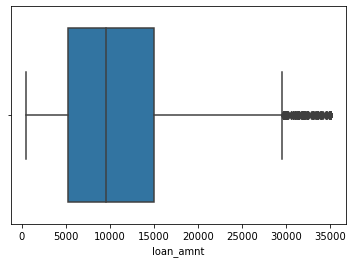

In [174]:
# plotting box plot on loan amount 
sns.boxplot(df_set1.loan_amnt)
plt.show()

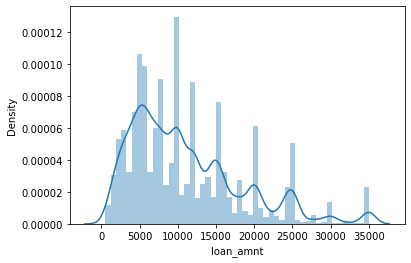

In [175]:
# plotting the distribution of loan amount
sns.distplot(df_set1.loan_amnt)
plt.show()

In [176]:
# creating bins for loan_amnt 
interval = (0,5000, 10000, 15000, 20000, 40000)

cats = ['<5k','5-10k','10-15k','15-20k','>20k']
df_set1['loan_amnt_categ'] = pd.cut(df_set1.loan_amnt,interval, labels = cats)

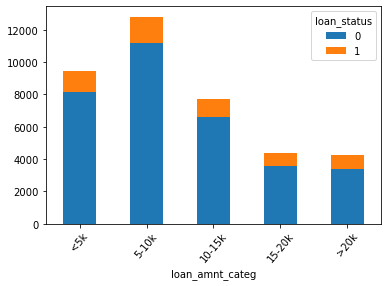

In [177]:
df_set1.groupby('loan_amnt_categ')['loan_status'].value_counts().unstack().plot(kind = 'bar',stacked = True)
plt.xticks(rotation = 50)
plt.show()

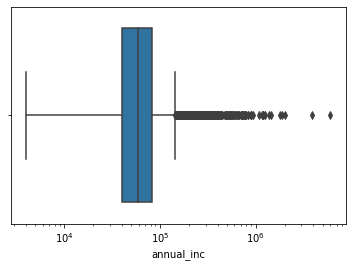

In [178]:
# plotting box plot on annual income data
fig = plt.figure()
sns.boxplot(df_set1.annual_inc)
ax = plt.axes()
ax.set(xscale = 'log')
plt.show()

In [182]:
# there are some outliers present in this data hence calculate further stats on this
df_set1.annual_inc.describe()

count    3.857700e+04
mean     6.877797e+04
std      6.421868e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.886800e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [180]:

# let's find out the 90th and 95th percentile
print(f'90th percentile for annual income {df_set1.annual_inc.quantile(.90)}')
print(f'95th percentile for annual income {df_set1.annual_inc.quantile(.95)}')
print(f'difference between 90th and 95th percentile {df_set1.annual_inc.quantile(.95) - df_set1.annual_inc.quantile(.90)}')
print(f'difference between 95th and max {df_set1.annual_inc.max() - df_set1.annual_inc.quantile(.95)}')

90th percentile for annual income 115000.0
95th percentile for annual income 140004.0
difference between 90th and 95th percentile 25004.0
difference between 95th and max 5859996.0


In [183]:
# No of records whose annual income is greater than 95th percentile
df_set1[df_set1.annual_inc > df_set1.annual_inc.quantile(.95)].shape

(1923, 17)

In [187]:
# We are removing these 1923 rows to reduce outliers from our data
df_set1 = df_set1[df_set1.annual_inc <= df_set1.annual_inc.quantile(.95)]
ps.box(df_set1 , x = 'annual_inc', title = ' Annual Income Stats')

In [188]:
df_set1.annual_inc.describe()

count     36654.000000
mean      60855.744994
std       27750.285238
min        4000.000000
25%       40000.000000
50%       56000.000000
75%       77970.500000
max      140004.000000
Name: annual_inc, dtype: float64

In [193]:
# creating bins for annual income 
interval = (0,40000, 60000, 80000, 100000,150000)

cats = ['<40k','40-60k','60-80k','80-100k','>100k']
df_set1['ann_inc_categ'] = pd.cut(df_set1.annual_inc,interval, labels = cats)

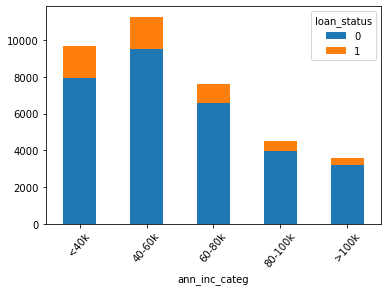

In [199]:
df_set1.groupby('ann_inc_categ')['loan_status'].value_counts().unstack().plot(kind = 'bar',stacked = True)
plt.xticks(rotation = 50)
plt.show()

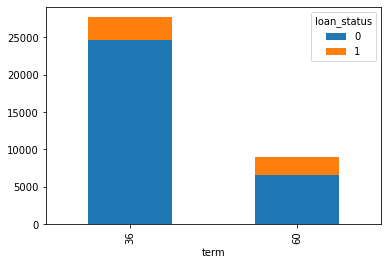

In [214]:
# Analyzing term with loan status
df_set1.groupby('term')['loan_status'].value_counts().unstack().plot(kind = 'bar',stacked = True)
plt.show()

In [240]:
# percentage of records for both loan status for term = 60 months
abc = df_set1[df_set1.term == 60].groupby('loan_status')
paid_perc = round(abc.count()['loan_amnt'][0] / (abc.count()['loan_amnt'][0]+ abc.count()['loan_amnt'][1]) * 100,2)
chargedoff_perc = round(abc.count()['loan_amnt'][1] / (abc.count()['loan_amnt'][0]+ abc.count()['loan_amnt'][1]) * 100,2)
print(f'{paid_perc}% Paid loan when term was 60 months')
print(f'{chargedoff_perc}% Failed to pay loan when term was 60 months')

# percentage of records for both loan status for term = 36 months
abc = df_set1[df_set1.term == 36].groupby('loan_status')
paid_perc = round(abc.count()['loan_amnt'][0] / (abc.count()['loan_amnt'][0]+ abc.count()['loan_amnt'][1]) * 100,2)
chargedoff_perc = round(abc.count()['loan_amnt'][1] / (abc.count()['loan_amnt'][0]+ abc.count()['loan_amnt'][1]) * 100,2)
print(f'{paid_perc}% Paid loan when term was 36 months')
print(f'{chargedoff_perc}% Failed to pay loan when term was 36 months')

74.21% Paid loan when term was 60 months
25.79% Failed to pay loan when term was 60 months
88.77% Paid loan when term was 36 months
11.23% Failed to pay loan when term was 36 months


In [242]:
# Analyzing interest rate 
# plotting box plot on interest rate
ps.box(df_set1 , x = 'int_rate', title = ' Interest Rate Stats')

In [243]:
# creating bins for interest rate 
interval = (0,8, 12, 15, 25)

cats = ['low','mid','high','very-high']
df_set1['int_rate_categ'] = pd.cut(df_set1.int_rate,interval, labels = cats)

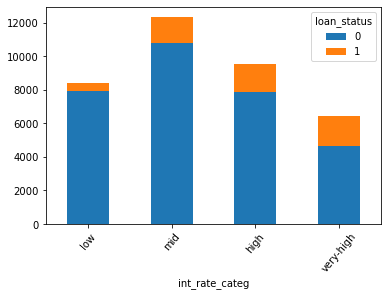

In [248]:
# Analyzing interest rate with loan status
df_set1.groupby('int_rate_categ')['loan_status'].value_counts().unstack().plot(kind = 'bar',stacked = True)
plt.xticks(rotation=50)
plt.show()

In [251]:
# plotting box plot on installment
ps.box(df_set1 , x = 'installment', title = ' installment Stats')

In [258]:
print(df_set1.installment.quantile(.97)) # 97th percentile of installment
print(df_set1.installment.max()) # max of installment
# no of rows which are greater than 97th percentile
df_set1[df_set1.installment > df_set1.installment.quantile(.97)].shape

810.0
1305


(1092, 19)

In [268]:
# Removing these 1092 rows and then plotting box plot
df_set1 = df_set1[df_set1.installment <= df_set1.installment.quantile(.97)]
ps.box(df_set1 , x = 'installment', title = ' installment Stats after removing outliers')

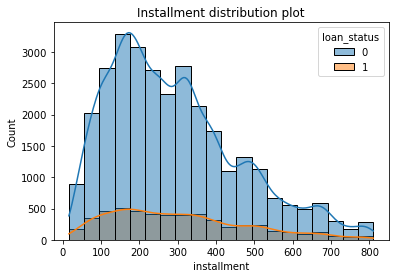

In [266]:
sns.histplot(data = df_set1, x ='installment',bins =20,kde = True,hue='loan_status')
plt.title('Installment distribution plot')
plt.show()

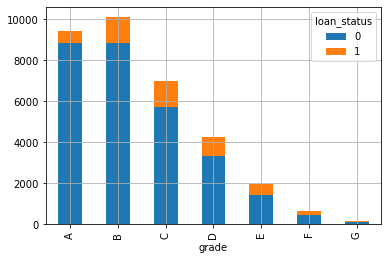

In [294]:
# Analyzing Grade and Subgrade variables
df_set1.groupby('grade')['loan_status'].value_counts().unstack().plot(kind = 'bar',stacked = True)
plt.grid()
plt.show()

In [287]:
#Extracting subgrade number from subgrade column and saving in sub_grad_num which can be used in bivariate analysis
df_set1['sub_grade_num'] = df_set1.sub_grade.apply(lambda x : int(x[-1]))

In [289]:
#Extracting month and year when the loan was issued into new variables
df_set1['issue_d_mon'] = df_set1.issue_d.apply(lambda x : x[:3])
df_set1['issue_d_year'] = df_set1.issue_d.apply(lambda x : x[-2:])

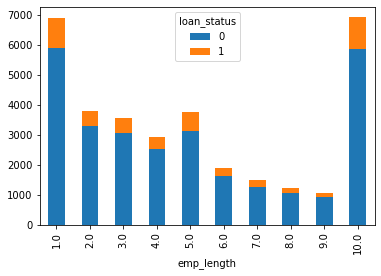

In [297]:
#plotting on employment length
df_set1.groupby('emp_length')['loan_status'].value_counts().unstack().plot(kind = 'bar',stacked = True)
# plt.grid()
plt.show()


In [299]:
df_set1.home_ownership.value_counts()

RENT        16785
MORTGAGE    13947
OWN          2661
OTHER          87
NONE            3
Name: home_ownership, dtype: int64

In [304]:
# There are very few records for Other and None type of home ownership so these records can be removed
df_set1 = df_set1[~df_set1.home_ownership.isin(['OTHER','NONE'])]

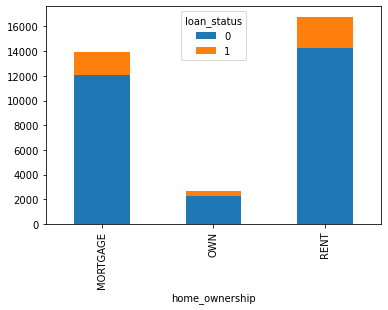

In [305]:
#plotting barplot on home ownership
df_set1.groupby('home_ownership')['loan_status'].value_counts().unstack().plot(kind = 'bar',stacked = True)
plt.show()

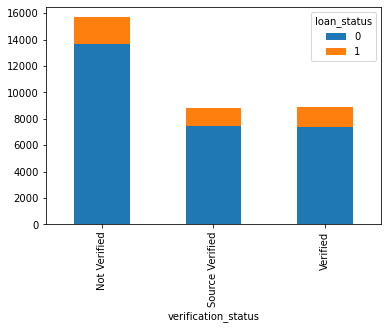

In [306]:
#plotting barplot on verification status
df_set1.groupby('verification_status')['loan_status'].value_counts().unstack().ploßt(kind = 'bar',stacked = True)
plt.show()

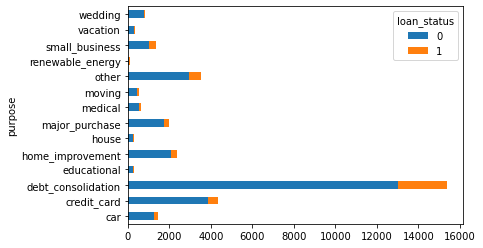

In [309]:
#plotting barplot on purpose
df_set1.groupby('purpose')['loan_status'].value_counts().unstack().plot(kind = 'barh',stacked = True)
plt.show()

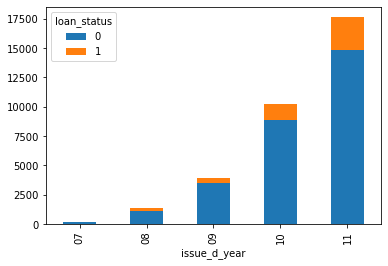

In [314]:
# plotting bar plot on the loan issue year
df_set1.groupby('issue_d_year')['loan_status'].value_counts().unstack().plot(kind = 'bar',stacked = True)
plt.show()

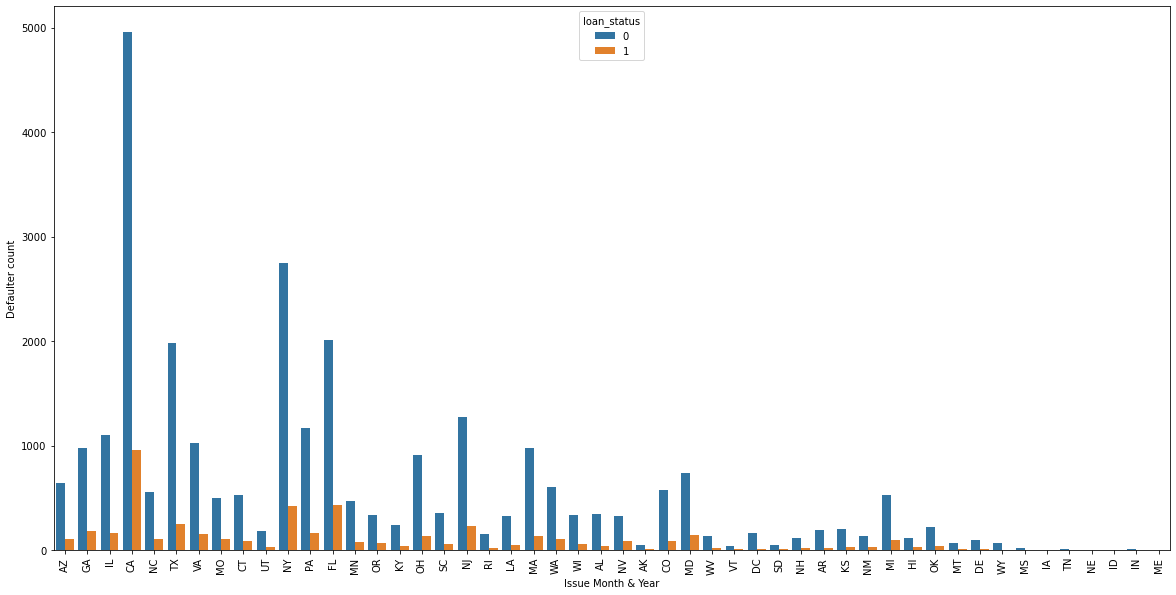

In [325]:
# plotting bar plot on the loan issue year
fig = plt.figure(figsize = (20,10))
sns.countplot(data = df_set1, x = 'addr_state',hue='loan_status')
plt.xlabel('Issue Month & Year')
plt.ylabel('Defaulter count')
plt.xticks(rotation = 90)
plt.show()

In [329]:
# creating bins for debt to income ratio
interval = (0,5, 10, 15, 20,25,30)

cats = ['<5','5-10','10-15','15-20','20-25','>25']
df_set1['dti_categ'] = pd.cut(df_set1.dti,interval, labels = cats)

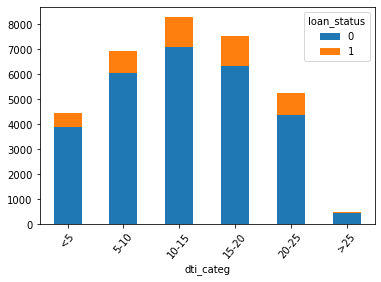

In [331]:
df_set1.groupby('dti_categ')['loan_status'].value_counts().unstack().plot(kind = 'bar',stacked = True)
plt.xticks(rotation=50)
plt.show()

### Univariate analysis observation
#### Borrowers tend to default the loan payment for following scenarios
1. When the amount of loan requested is less than 10k
2. If the annual income of requestor is less than 60k.
3. If the loan term is 60 months then 25% borrowers failed to pay the loan
4. When the interest rate is greater than 10%.
5. When the installment of loan is between 100-300.
6. When the Grade assigned to loan is B or C.
7. If the experience of employee is 1, 5 or 10 years.
8. If borrower has house either on Rent or on Mortgage.
9. When the purpose of loan is to consolidate the other debt.
10. If the loan was issue in 2011.
11. If the loan was issued on CA state.
12. If the debt to income ratio is between 5-20